In [27]:
#IMporting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [28]:
#loading the file
df = pd.read_csv('general_data.csv')

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [29]:
list(df.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeID',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'Over18',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [30]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [37]:
df.shape
#data in tuple - where row * col

(4410, 24)

In [33]:
df.isnull().sum().sort_values()

Age                         0
YearsAtCompany              0
TrainingTimesLastYear       0
StockOptionLevel            0
StandardHours               0
PercentSalaryHike           0
Over18                      0
MonthlyIncome               0
MaritalStatus               0
YearsSinceLastPromotion     0
JobRole                     0
Gender                      0
EmployeeID                  0
EmployeeCount               0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
BusinessTravel              0
Attrition                   0
JobLevel                    0
YearsWithCurrManager        0
TotalWorkingYears           9
NumCompaniesWorked         19
dtype: int64

In [36]:
print(len(df.index))
print(df.shape[0])

4410
4410


In [39]:
#Checking null values
(df.isnull().sum()/len(df.index)).sort_values()

Age                        0.000000
YearsAtCompany             0.000000
TrainingTimesLastYear      0.000000
StockOptionLevel           0.000000
StandardHours              0.000000
PercentSalaryHike          0.000000
Over18                     0.000000
MonthlyIncome              0.000000
MaritalStatus              0.000000
YearsSinceLastPromotion    0.000000
JobRole                    0.000000
Gender                     0.000000
EmployeeID                 0.000000
EmployeeCount              0.000000
EducationField             0.000000
Education                  0.000000
DistanceFromHome           0.000000
Department                 0.000000
BusinessTravel             0.000000
Attrition                  0.000000
JobLevel                   0.000000
YearsWithCurrManager       0.000000
TotalWorkingYears          0.002041
NumCompaniesWorked         0.004308
dtype: float64

#### Observation:
We have certain null values in NumCompaniesWorked

In [40]:
df.NumCompaniesWorked #does not work if col_name has' '
df['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

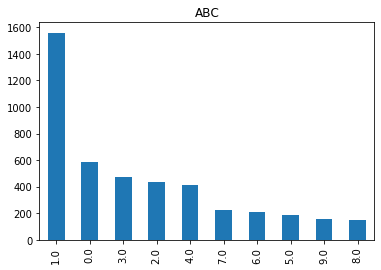

In [42]:
#Visualization of numbers of companies worked.
df.NumCompaniesWorked.value_counts().plot(kind='bar')
#plt.title('ABC')
plt.show()

SInce most of the cases have 1 companies only, we may impute those null values with 1.

In [67]:
df['DistanceFromHome'].value_counts()

2     633
1     624
10    258
9     255
7     252
3     252
8     240
5     195
4     192
6     177
16     96
11     87
24     84
23     81
29     81
18     78
15     78
25     75
26     75
20     75
28     69
19     66
14     63
17     60
12     60
13     57
22     57
21     54
27     36
Name: DistanceFromHome, dtype: int64

In [53]:
#Imputing nulls in NumCompaniesWorked with mode
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mode()[0], inplace=True)

#df = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mode()[0])

In [52]:
df['NumCompaniesWorked'].mode()[0]

1.0

In [54]:
round(df.isnull().sum(),2).sort_values()

Age                        0
YearsAtCompany             0
TrainingTimesLastYear      0
StockOptionLevel           0
StandardHours              0
PercentSalaryHike          0
Over18                     0
NumCompaniesWorked         0
MonthlyIncome              0
MaritalStatus              0
YearsSinceLastPromotion    0
JobRole                    0
Gender                     0
EmployeeID                 0
EmployeeCount              0
EducationField             0
Education                  0
DistanceFromHome           0
Department                 0
BusinessTravel             0
Attrition                  0
JobLevel                   0
YearsWithCurrManager       0
TotalWorkingYears          9
dtype: int64

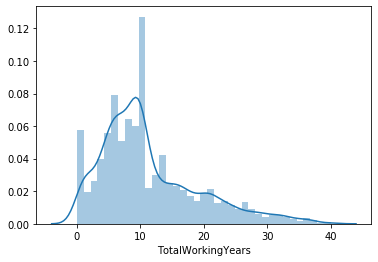

In [55]:
#There are 9 NaN rows in TotalWorkingYears

#Checking distribution
sns.distplot(df['TotalWorkingYears'])
plt.show()

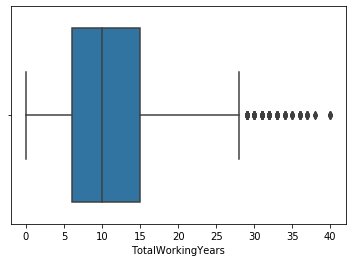

In [19]:
sns.boxplot(df['TotalWorkingYears'])
plt.show()

In [57]:
df['TotalWorkingYears'].value_counts()

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
2.0      93
14.0     93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
26.0     42
28.0     42
25.0     42
0.0      33
29.0     30
32.0     27
31.0     27
33.0     21
27.0     21
30.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [65]:
df[df.TotalWorkingYears.isnull()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,1,Manufacturing Director,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,1,Manufacturing Director,Married,37480,7.0,Y,14,8,2,NaN,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,1,Research Director,Single,27740,4.0,Y,13,8,1,NaN,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,1,575,Male,3,Manufacturing Director,Divorced,166590,7.0,Y,16,8,1,NaN,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1,1518,Male,1,Sales Executive,Married,85780,7.0,Y,21,8,0,NaN,4,9,0,8
2367,39,No,Travel_Rarely,Sales,2,4,Life Sciences,1,2368,Male,1,Laboratory Technician,Divorced,72640,0.0,Y,17,8,0,NaN,5,10,0,7
3120,35,No,Travel_Rarely,Research & Development,12,2,Medical,1,3121,Female,2,Sales Representative,Married,28090,4.0,Y,23,8,1,NaN,2,8,0,0
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,1,3819,Female,2,Laboratory Technician,Married,24130,1.0,Y,16,8,1,NaN,2,1,0,0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9
